# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import os

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

604

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
wurl  ="http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

#Constuct query url for city list

query_url = f"{wurl}appid={weather_api_key}&units={units}&q="

#Creating lists for retrieved informaiton

clouds = []
hemis = []
date = []
temp = []
humidity = []
wind = []
city_names = []
country = []
latitude = []
longitude = []
high_temp = []

#Creating data and output
print("Data is being retrieved")
print("----------------------------------------------------------------------------")
print("")

lc = 1
nb_tries = 10

#looping through the city list to reteive data

for city in cities:
    city_url = query_url + city.replace(' ', '+')
    city_data = requests.get(city_url)
    print(f"Pulling in data of city #{lc} = {city}")
    #print(city_url)
    
    try:
        city_data.raise_for_status()
        data = city_data.json()
        #printing dat # to check the key structure
        time.sleep(1) #to keep system from crashing due to over processing
        city_names.append(city)
        clouds.append(data['clouds']['all'])
        country.append(data['sys']['country'])
        date.append(data['dt'])
        humidity.append(data['main']['humidity'])
        latitude.append(data['coord']['lat'])
        longitude.append(data['coord']['lon'])
        high_temp.append(data['main']['temp_max'])
        wind.append(data['wind']['speed'])
        
    except requests.exceptions.HTTPError as e:
        print(f"{city} has no data on file. Moving along.")
        print(str(e))
    except ConnectionError as err:
        if nb_tries == 0:
            raise err
        else:
            time.sleep(1)
    lc += 1
    nb_tries -+ 1
    
#closing section
print("")
print("----------------------------------------------------------------------------")
print("Data gathering is complete")

Data is being retrieved
----------------------------------------------------------------------------

Pulling in data of city #1 = sao francisco
Pulling in data of city #2 = port alfred
Pulling in data of city #3 = grindavik
Pulling in data of city #4 = liniere
liniere has no data on file. Moving along.
404 Client Error: Not Found for url: http://api.openweathermap.org/data/2.5/weather?appid=295a176d0aea4cd626f27342eccff100&units=metric&q=liniere
Pulling in data of city #5 = carnarvon
Pulling in data of city #6 = romilly-sur-seine
Pulling in data of city #7 = vaini
Pulling in data of city #8 = jamestown
Pulling in data of city #9 = busselton
Pulling in data of city #10 = hilo
Pulling in data of city #11 = hendijan
hendijan has no data on file. Moving along.
404 Client Error: Not Found for url: http://api.openweathermap.org/data/2.5/weather?appid=295a176d0aea4cd626f27342eccff100&units=metric&q=hendijan
Pulling in data of city #12 = kapaa
Pulling in data of city #13 = pangnirtung
Pulling

Pulling in data of city #137 = pochutla
Pulling in data of city #138 = aksha
Pulling in data of city #139 = novyy urgal
Pulling in data of city #140 = rio grande
Pulling in data of city #141 = san patricio
Pulling in data of city #142 = amderma
amderma has no data on file. Moving along.
404 Client Error: Not Found for url: http://api.openweathermap.org/data/2.5/weather?appid=295a176d0aea4cd626f27342eccff100&units=metric&q=amderma
Pulling in data of city #143 = dikson
Pulling in data of city #144 = caravelas
Pulling in data of city #145 = pevek
Pulling in data of city #146 = phan thiet
Pulling in data of city #147 = fort saint james
Pulling in data of city #148 = tura
Pulling in data of city #149 = puerto ayora
Pulling in data of city #150 = koshurnikovo
Pulling in data of city #151 = cairns
Pulling in data of city #152 = talnakh
Pulling in data of city #153 = dolores
Pulling in data of city #154 = pokhara
Pulling in data of city #155 = san cristobal
Pulling in data of city #156 = port 

Pulling in data of city #282 = santarem
Pulling in data of city #283 = ilinskiy
Pulling in data of city #284 = sao joao da barra
Pulling in data of city #285 = ierapetra
Pulling in data of city #286 = palmer
Pulling in data of city #287 = kuche
kuche has no data on file. Moving along.
404 Client Error: Not Found for url: http://api.openweathermap.org/data/2.5/weather?appid=295a176d0aea4cd626f27342eccff100&units=metric&q=kuche
Pulling in data of city #288 = angoche
Pulling in data of city #289 = los llanos de aridane
Pulling in data of city #290 = banjar
Pulling in data of city #291 = vila velha
Pulling in data of city #292 = benguela
Pulling in data of city #293 = sao filipe
Pulling in data of city #294 = cahul
Pulling in data of city #295 = haines junction
Pulling in data of city #296 = sabha
Pulling in data of city #297 = nguiu
nguiu has no data on file. Moving along.
404 Client Error: Not Found for url: http://api.openweathermap.org/data/2.5/weather?appid=295a176d0aea4cd626f27342ecc

Pulling in data of city #424 = muskogee
Pulling in data of city #425 = caraballeda
Pulling in data of city #426 = coruripe
Pulling in data of city #427 = sambava
Pulling in data of city #428 = murgab
Pulling in data of city #429 = lolua
lolua has no data on file. Moving along.
404 Client Error: Not Found for url: http://api.openweathermap.org/data/2.5/weather?appid=295a176d0aea4cd626f27342eccff100&units=metric&q=lolua
Pulling in data of city #430 = berlevag
Pulling in data of city #431 = verkhoyansk
Pulling in data of city #432 = gorontalo
Pulling in data of city #433 = gazanjyk
Pulling in data of city #434 = neuquen
Pulling in data of city #435 = wucheng
Pulling in data of city #436 = chumikan
Pulling in data of city #437 = port-cartier
Pulling in data of city #438 = rudbar
Pulling in data of city #439 = lichinga
Pulling in data of city #440 = marienburg
Pulling in data of city #441 = chanika
Pulling in data of city #442 = yining
Pulling in data of city #443 = rochegda
Pulling in data

Pulling in data of city #582 = manama
Pulling in data of city #583 = kutum
Pulling in data of city #584 = okhotsk
Pulling in data of city #585 = bullhead city
Pulling in data of city #586 = suwannaphum
Pulling in data of city #587 = puerto madryn
Pulling in data of city #588 = itacoatiara
Pulling in data of city #589 = maridi
Pulling in data of city #590 = tungkang
tungkang has no data on file. Moving along.
404 Client Error: Not Found for url: http://api.openweathermap.org/data/2.5/weather?appid=295a176d0aea4cd626f27342eccff100&units=metric&q=tungkang
Pulling in data of city #591 = guatire
Pulling in data of city #592 = makakilo city
Pulling in data of city #593 = samaro
Pulling in data of city #594 = nuevo ideal
Pulling in data of city #595 = edd
Pulling in data of city #596 = matata
Pulling in data of city #597 = jiaojiang
Pulling in data of city #598 = west hempstead
Pulling in data of city #599 = lakes entrance
Pulling in data of city #600 = asyut
Pulling in data of city #601 = ku

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [23]:
wdf = pd.DataFrame({
    'City':city_names,
    'Clouds':clouds,
    'Country':country,
    'Date':date,
    'Latitude':latitude,
    'Longitude':longitude,
    'High Temperature':high_temp,
    'Wind Speed':wind,
    'Humidity':humidity,
})

wdf.head()

#exporting dataframe to external .csv file
os.makedirs(os.path.join('output_data'), exist_ok=True)
external_df = os.path.join('output_data','cities.csv')
wdf.to_csv(external_df)
print(wdf.count())

print(f"We have {wdf['City'].count()} cities with complete data sets.")

City                553
Clouds              553
Country             553
Date                553
Latitude            553
Longitude           553
High Temperature    553
Wind Speed          553
Humidity            553
dtype: int64
We have 553 cities with complete data sets.


In [36]:
wdf.sort_values('Humidity', ascending = False)

,City,Clouds,Country,Date,Latitude,Longitude,High Temperature,Wind Speed,Humidity
156,mahebourg,75,MU,1618767807,-20.4081,57.7000,24.00,4.63,100
284,tumut,8,AU,1618767968,-35.3000,148.2167,4.00,1.41,100
317,nelson bay,7,AU,1618768010,-32.7167,152.1500,12.22,3.01,100
70,krapivinskiy,90,RU,1618767699,54.9992,86.8133,0.00,6.00,100
127,dikson,99,RU,1618767771,73.5069,80.5464,-21.84,1.32,100
...,...,...,...,...,...,...,...,...,...
57,atar,1,MR,1618767683,20.5169,-13.0499,35.25,4.74,7
336,adrar,0,MR,1618768034,20.5022,-10.0711,33.17,3.99,7
101,umm kaddadah,5,SD,1618767738,13.6017,26.6876,29.61,4.91,6
533,kutum,3,SD,1618768285,14.2000,24.6667,27.11,3.52,6


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [105]:
print("There are no cities with Humidity over 100%")

There are no cities with Humidity over 100%


In [106]:
#  Get the indices of cities that have humidity over 100%.


In [107]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

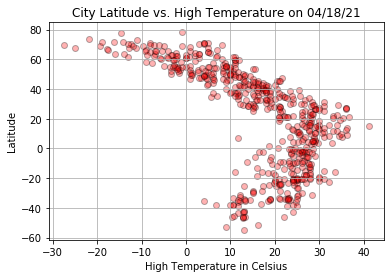

In [108]:
#Creating Scatter Plots for Latitude vs different datas
plt.scatter(wdf['High Temperature'],wdf['Latitude'],  alpha = 0.3, edgecolors = 'black', color = 'red')
plt.title(f"City Latitude vs. High Temperature on {time.strftime('%m/%d/%y')}")
plt.ylabel("Latitude")
plt.xlabel("High Temperature in Celsius")
plt.grid()
plt.savefig(os.path.join('output_data',f"Latitude_v_High_Temp.png"))

## Latitude vs. Humidity Plot

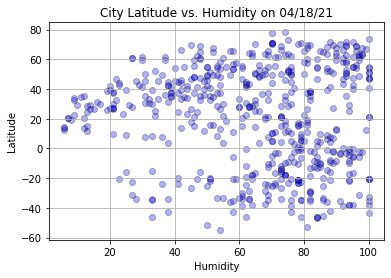

In [109]:
plt.scatter(wdf['Humidity'], wdf['Latitude'], alpha = 0.3, edgecolors = 'black', color = 'blue')
plt.title(f"City Latitude vs. Humidity on {time.strftime('%m/%d/%y')}")
plt.ylabel("Latitude")
plt.xlabel("Humidity")
plt.grid()
plt.savefig(os.path.join('output_data',f"Latitude_v_Humidity.png"))

## Latitude vs. Cloudiness Plot

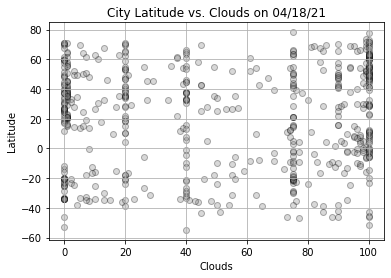

In [110]:
plt.scatter(wdf['Clouds'], wdf['Latitude'], alpha = 0.3, edgecolors = 'black', color = 'grey')
plt.title(f"City Latitude vs. Clouds on {time.strftime('%m/%d/%y')}")
plt.ylabel("Latitude")
plt.xlabel("Clouds")
plt.grid()
plt.savefig(os.path.join('output_data',f"Latitude_v_Clouds.png"))

## Latitude vs. Wind Speed Plot

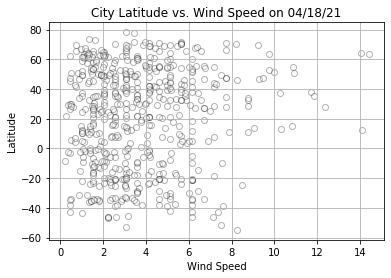

In [111]:
plt.scatter(wdf['Wind Speed'], wdf['Latitude'], alpha = 0.3, edgecolors = 'black', color = 'white')
plt.title(f"City Latitude vs. Wind Speed on {time.strftime('%m/%d/%y')}")
plt.ylabel("Latitude")
plt.xlabel("Wind Speed")
plt.grid()
plt.savefig(os.path.join('output_data',f"Latitude_v_Wind_Speed.png"))

## Linear Regression

In [112]:
#Splitting data into Northern and Southern Hemisperes

#Northern hemisphere
north_h = wdf.loc[wdf['Latitude'] > 0]
north_h

,City,Clouds,Country,Date,Latitude,Longitude,High Temperature,Wind Speed,Humidity
2,grindavik,75,IS,1618767614,63.8424,-22.4338,3.00,14.40,87
4,romilly-sur-seine,0,FR,1618767617,48.5108,3.7263,13.00,2.57,50
6,jamestown,75,US,1618767619,42.0970,-79.2353,12.22,4.12,50
8,hilo,1,US,1618767622,19.7297,-155.0900,21.11,2.06,68
9,kapaa,90,US,1618767623,22.0752,-159.3190,22.00,3.60,73
...,...,...,...,...,...,...,...,...,...
547,west hempstead,75,US,1618768010,40.7048,-73.6501,16.11,5.14,51
549,asyut,0,EG,1618768305,27.1810,31.1837,36.00,6.69,21
550,kushiro,64,JP,1618768306,42.9750,144.3747,4.79,2.44,95
551,fukue,80,JP,1618768308,32.6881,128.8419,13.48,6.59,51


In [113]:
#Southern hemisphere
south_h = wdf.loc[wdf['Latitude'] < 0]
south_h

,City,Clouds,Country,Date,Latitude,Longitude,High Temperature,Wind Speed,Humidity
0,sao francisco,10,BR,1618767612,-15.9486,-44.8644,33.49,2.43,25
1,port alfred,0,ZA,1618767613,-33.5906,26.8910,23.13,2.41,55
3,carnarvon,0,AU,1618767615,-24.8667,113.6333,24.27,8.47,71
5,vaini,20,TO,1618767618,-21.2000,-175.2000,20.00,4.86,94
7,busselton,40,AU,1618767621,-33.6500,115.3333,10.56,3.34,86
...,...,...,...,...,...,...,...,...,...
525,comodoro rivadavia,0,AR,1618768139,-45.8667,-67.5000,22.00,6.17,33
537,puerto madryn,51,AR,1618768139,-42.7692,-65.0385,24.06,7.38,38
538,itacoatiara,69,BR,1618768291,-3.1431,-58.4442,25.49,2.13,93
545,matata,50,NZ,1618768300,-37.8833,176.7500,10.56,0.45,95


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is -0.8704011285503537


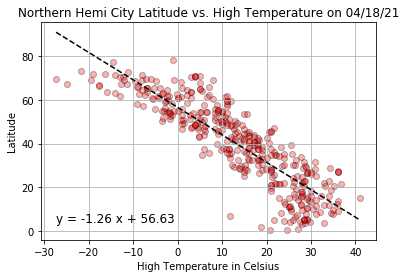

In [114]:
plt.scatter(north_h['High Temperature'],north_h['Latitude'], alpha = 0.3, edgecolors = 'black', color = 'red')
plt.title(f"Northern Hemi City Latitude vs. High Temperature on {time.strftime('%m/%d/%y')}")
plt.ylabel("Latitude")
plt.xlabel("High Temperature in Celsius")
plt.grid()

          
#creating linear regression pieces
slope, inter, r, p, std_err = linregress(north_h['High Temperature'], north_h['Latitude'])
print(f"The r-value is {r}")

x_range = np.arange(north_h['High Temperature'].min(), north_h['High Temperature'].max(),.25,dtype="float")
x_range

fit = slope * x_range + inter
line = "y = "+ str(round(slope, 2)) + " x + " + str(round(inter,2))

plt.plot(x_range,fit,"--", color = "black")
plt.annotate(line, (north_h['High Temperature'].min(), north_h['High Temperature'].max() * 0.1), fontsize = 12, color = "black")


plt.savefig(os.path.join('output_data',f"North_Hemi_Latitude_v_High_Temp.png"))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is 0.5753152600340754


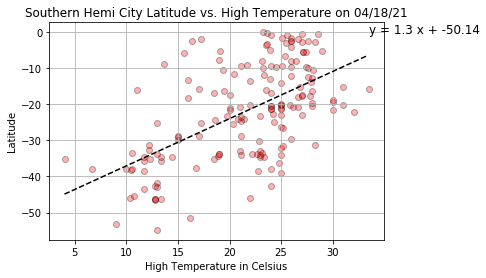

In [115]:
plt.scatter(south_h['High Temperature'],south_h['Latitude'], alpha = 0.3, edgecolors = 'black', color = 'red')
plt.title(f"Southern Hemi City Latitude vs. High Temperature on {time.strftime('%m/%d/%y')}")
plt.ylabel("Latitude")
plt.xlabel("High Temperature in Celsius")
plt.grid()
          
#creating linear regression pieces
slope, inter, r, p, std_err = linregress(south_h['High Temperature'], south_h['Latitude'])
print(f"The r-value is {r}")

x_range = np.arange(south_h['High Temperature'].min(), south_h['High Temperature'].max(),.25,dtype="float")
x_range

fit = slope * x_range + inter
line = "y = "+ str(round(slope, 2)) + " x + " + str(round(inter,2))

plt.plot(x_range,fit,"--", color = "black")
plt.annotate(line, (south_h['High Temperature'].max(), south_h['High Temperature'].min() * -0.1), fontsize = 12, color = "black")
          
plt.savefig(os.path.join('output_data',f"South_Hemi_Latitude_v_High_Temp.png"))

This scatter plot is showing a relationship between latitude and high temperature.  There is a clear correlation between temperature and latitude.  The scatter plot above demonstrates that as you move closer the the equator, the high temperature rises.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.2352834821514342


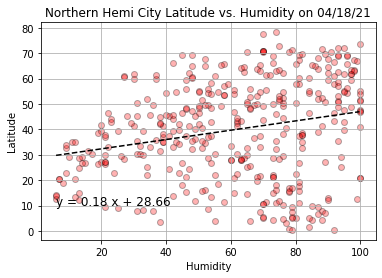

In [116]:
plt.scatter(north_h['Humidity'],north_h['Latitude'], alpha = 0.3, edgecolors = 'black', color = 'red')
plt.title(f"Northern Hemi City Latitude vs. Humidity on {time.strftime('%m/%d/%y')}")
plt.ylabel("Latitude")
plt.xlabel("Humidity")
plt.grid()

          
#creating linear regression pieces
slope, inter, r, p, std_err = linregress(north_h['Humidity'], north_h['Latitude'])
print(f"The r-value is {r}")

x_range = np.arange(north_h['Humidity'].min(), north_h['Humidity'].max(),.25,dtype="float")
x_range

fit = slope * x_range + inter
line = "y = "+ str(round(slope, 2)) + " x + " + str(round(inter,2))

plt.plot(x_range,fit,"--", color = "black")
plt.annotate(line, (north_h['Humidity'].min(), north_h['Humidity'].max() * 0.1), fontsize = 12, color = "black")


plt.savefig(os.path.join('output_data',f"North_Hemi_Latitude_v_Humidity.png"))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.24437067924388187


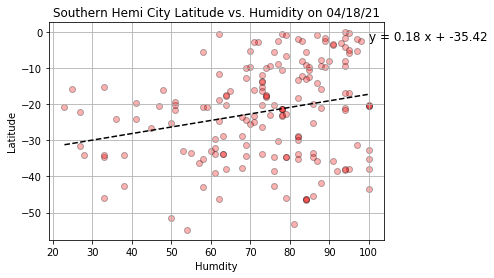

In [117]:
plt.scatter(south_h['Humidity'],south_h['Latitude'], alpha = 0.3, edgecolors = 'black', color = 'red')
plt.title(f"Southern Hemi City Latitude vs. Humidity on {time.strftime('%m/%d/%y')}")
plt.ylabel("Latitude")
plt.xlabel("Humdity")
plt.grid()
          
#creating linear regression pieces
slope, inter, r, p, std_err = linregress(south_h['Humidity'], south_h['Latitude'])
print(f"The r-value is {r}")

x_range = np.arange(south_h['Humidity'].min(), south_h['Humidity'].max(),.25,dtype="float")
x_range

fit = slope * x_range + inter
line = "y = "+ str(round(slope, 2)) + " x + " + str(round(inter,2))

plt.plot(x_range,fit,"--", color = "black")
plt.annotate(line, (south_h['Humidity'].max(), south_h['Humidity'].min() * -0.1), fontsize = 12, color = "black")
          
plt.savefig(os.path.join('output_data',f"South_Hemi_Latitude_v_Humidity.png"))

This scatter plot is showing a relationship between latitude and humitidy.  The correlation between latitude and humidty is much weaker than latitude and temperature, but I feel one still is there.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.043491933043072147


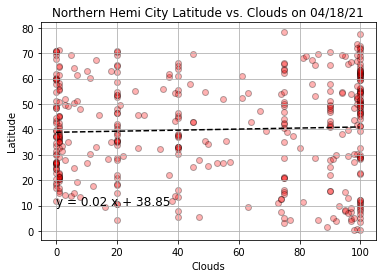

In [118]:
plt.scatter(north_h['Clouds'],north_h['Latitude'], alpha = 0.3, edgecolors = 'black', color = 'red')
plt.title(f"Northern Hemi City Latitude vs. Clouds on {time.strftime('%m/%d/%y')}")
plt.ylabel("Latitude")
plt.xlabel("Clouds")
plt.grid()

          
#creating linear regression pieces
slope, inter, r, p, std_err = linregress(north_h['Clouds'], north_h['Latitude'])
print(f"The r-value is {r}")

x_range = np.arange(north_h['Clouds'].min(), north_h['Clouds'].max(),.25,dtype="float")
x_range

fit = slope * x_range + inter
line = "y = "+ str(round(slope, 2)) + " x + " + str(round(inter,2))

plt.plot(x_range,fit,"--", color = "black")
plt.annotate(line, (north_h['Clouds'].min(), north_h['Clouds'].max() * 0.1), fontsize = 12, color = "black")


plt.savefig(os.path.join('output_data',f"North_Hemi_Latitude_v_Clouds.png"))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.2877121105486165


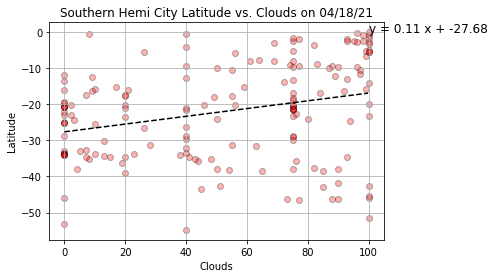

In [119]:
plt.scatter(south_h['Clouds'],south_h['Latitude'], alpha = 0.3, edgecolors = 'black', color = 'red')
plt.title(f"Southern Hemi City Latitude vs. Clouds on {time.strftime('%m/%d/%y')}")
plt.ylabel("Latitude")
plt.xlabel("Clouds")
plt.grid()
          
#creating linear regression pieces
slope, inter, r, p, std_err = linregress(south_h['Clouds'], south_h['Latitude'])
print(f"The r-value is {r}")

x_range = np.arange(south_h['Clouds'].min(), south_h['Clouds'].max(),.25,dtype="float")
x_range

fit = slope * x_range + inter
line = "y = "+ str(round(slope, 2)) + " x + " + str(round(inter,2))

plt.plot(x_range,fit,"--", color = "black")
plt.annotate(line, (south_h['Clouds'].max(), south_h['Clouds'].min() * -0.1), fontsize = 12, color = "black")
          
plt.savefig(os.path.join('output_data',f"South_Hemi_Latitude_v_Clouds.png"))

In comparing Latitude to cloud levels, there is no correlation.  The scatter plot follows no linear regression.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is 0.03339668981933342


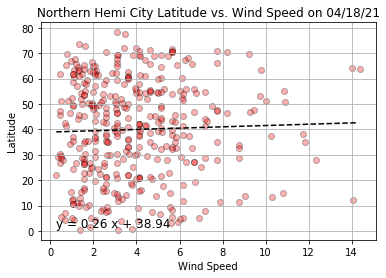

In [120]:
plt.scatter(north_h['Wind Speed'],north_h['Latitude'], alpha = 0.3, edgecolors = 'black', color = 'red')
plt.title(f"Northern Hemi City Latitude vs. Wind Speed on {time.strftime('%m/%d/%y')}")
plt.ylabel("Latitude")
plt.xlabel("Wind Speed")
plt.grid()

          
#creating linear regression pieces
slope, inter, r, p, std_err = linregress(north_h['Wind Speed'], north_h['Latitude'])
print(f"The r-value is {r}")

x_range = np.arange(north_h['Wind Speed'].min(), north_h['Wind Speed'].max(),.25,dtype="float")
x_range

fit = slope * x_range + inter
line = "y = "+ str(round(slope, 2)) + " x + " + str(round(inter,2))

plt.plot(x_range,fit,"--", color = "black")
plt.annotate(line, (north_h['Wind Speed'].min(), north_h['Wind Speed'].max() * 0.1), fontsize = 12, color = "black")


plt.savefig(os.path.join('output_data',f"North_Hemi_Latitude_v_Wind Speed.png"))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is -0.224499098316735


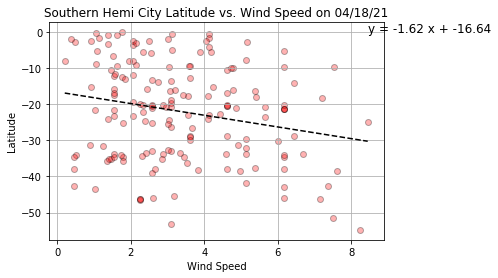

In [121]:
plt.scatter(south_h['Wind Speed'],south_h['Latitude'], alpha = 0.3, edgecolors = 'black', color = 'red')
plt.title(f"Southern Hemi City Latitude vs. Wind Speed on {time.strftime('%m/%d/%y')}")
plt.ylabel("Latitude")
plt.xlabel("Wind Speed")
plt.grid()
          
#creating linear regression pieces
slope, inter, r, p, std_err = linregress(south_h['Wind Speed'], south_h['Latitude'])
print(f"The r-value is {r}")

x_range = np.arange(south_h['Wind Speed'].min(), south_h['Wind Speed'].max(),.25,dtype="float")
x_range

fit = slope * x_range + inter
line = "y = "+ str(round(slope, 2)) + " x + " + str(round(inter,2))

plt.plot(x_range,fit,"--", color = "black")
plt.annotate(line, (south_h['Wind Speed'].max(), south_h['Wind Speed'].min() * -0.1), fontsize = 12, color = "black")
          
plt.savefig(os.path.join('output_data',f"South_Hemi_Latitude_v_Wind Speed.png"))

In comparing Latitude to wind speeds, there is no correlation.  The scatter plot follows no linear regression.